In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json

### CMMD

In [9]:
cmmd_train = pd.read_csv("data/cindy/all/train.csv ")
cmmd_dev = pd.read_csv("data/cindy/all/dev.csv ")
cmmd_test = pd.read_csv("data/cindy/all/test.csv ")

In [11]:
print(len(cmmd_train), len(cmmd_dev), len(cmmd_test))
print(len(cmmd_train) + len(cmmd_dev) + len(cmmd_test))

1190 170 340
1700


In [13]:
print(len(cmmd_train[cmmd_train['label']==1]), len(cmmd_dev[cmmd_dev['label']==1]), len(cmmd_test[cmmd_test['label']==1]))
print(len(cmmd_train[cmmd_train['label']==0])+len(cmmd_dev[cmmd_dev['label']==0])+len(cmmd_test[cmmd_test['label']==0]))

349 47 104
1200


### ToxiMM

In [2]:
toxi_mm_train_data = pd.read_json("data/toxi_mm/data/train.json")
toxi_mm_test_data = pd.read_json("data/toxi_mm/data/test.json")

Discription
1. counts
2. distribution

In [4]:
print(f"train_data: {len(toxi_mm_train_data)}, test_data: {len(toxi_mm_test_data)}, totoally: {len(toxi_mm_train_data) + len(toxi_mm_test_data)}")

train_data: 9600, test_data: 2400, totoally: 12000


In [5]:
train_label_distribution = toxi_mm_train_data.groupby("label").count()

print(train_label_distribution)

       filename  original_text  span  prompt  explanation  caption
label                                                             
0          6525           6525  6525    6525         6525     6525
1          3075           3075  3075    3075         3075     3075


In [7]:
test_label_distribution = toxi_mm_test_data.groupby("label").count()
print(test_label_distribution)

       filename  original_text  span  prompt  explanation  caption
label                                                             
0          1659           1659  1659    1659         1659     1659
1           741            741   741     741          741      741


### MET Dataset

In [18]:
with open("data/MET/converted_data.json", "r", encoding="utf-8") as f:
    met_data = json.load(f)
MET = pd.DataFrame(met_data)

In [19]:
len(MET[MET['label']==1])

1294

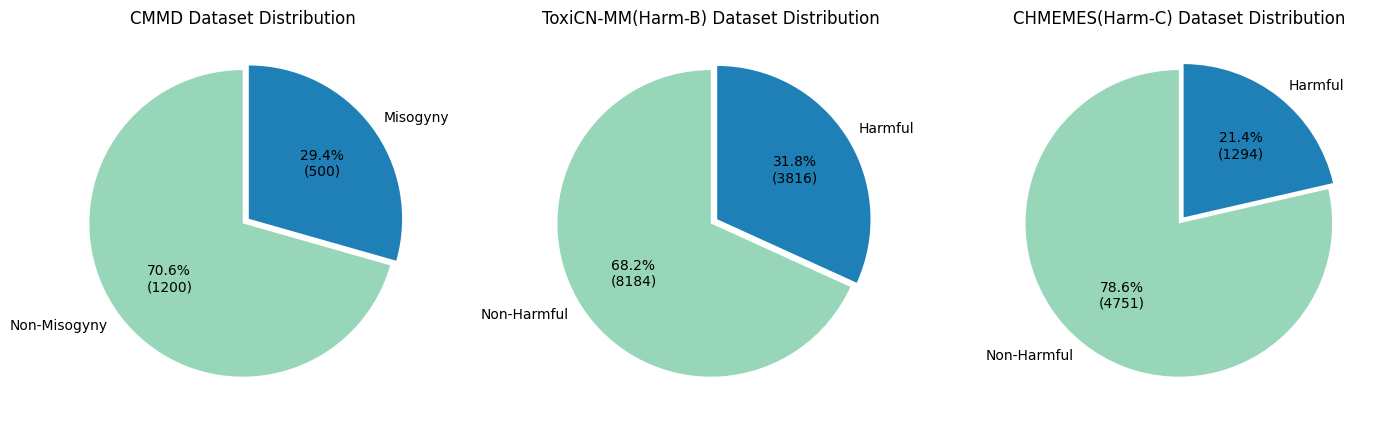

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# 获取一个和图中相似的颜色调色板
palette = sns.color_palette("YlGnBu", 2)  # 两个颜色，浅到深

# 三组数据
data1 = [1200, 500]
labels1 = ['Non-Misogyny', 'Misogyny']

data2 = [6525+1659, 3075+741]
labels2 = ['Non-Harmful','Harmful']

data3 = [6045-1294, 1294]
labels3 = ['Non-Harmful', 'Harmful']

fig, axes = plt.subplots(1, 3, figsize=(14, 5))
explode = (0, 0.05)

def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return f"{pct:.1f}%\n({val})"
    return my_format

# 第一个饼图
axes[0].pie(data1, labels=labels1, colors=palette, autopct=autopct_format(data1),
            explode=explode, startangle=90, textprops={'fontsize': 10})
axes[0].set_title('CMMD Dataset Distribution', fontsize=12)

# 第二个饼图
axes[1].pie(data2, labels=labels2, colors=palette, autopct=autopct_format(data2),
            explode=explode, startangle=90, textprops={'fontsize': 10})
axes[1].set_title('ToxiCN-MM(Harm-B) Dataset Distribution', fontsize=12)

# 第三个饼图
axes[2].pie(data3, labels=labels3, colors=palette, autopct=autopct_format(data3),
            explode=explode, startangle=90, textprops={'fontsize': 10})
axes[2].set_title('CHMEMES(Harm-C) Dataset Distribution', fontsize=12)

plt.tight_layout()
plt.show()


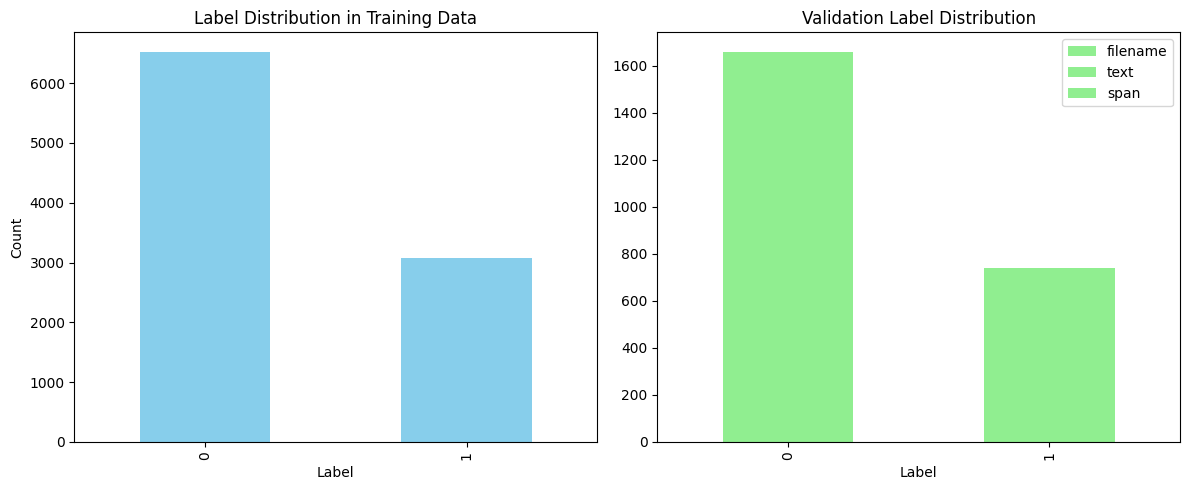

In [9]:
train_label_distribution = train_data['label'].value_counts().sort_index()
test_label_distribution = test_data.groupby("label").count().sort_index()

fix, axes = plt.subplots(1,2,figsize=(12,5))

train_label_distribution.plot(kind='bar',ax=axes[0],color='skyblue')
axes[0].set_title('Label Distribution in Training Data')
axes[0].set_xlabel('Label')
axes[0].set_ylabel('Count')


test_label_distribution.plot(kind='bar', ax=axes[1], color='lightgreen')
axes[1].set_title('Validation Label Distribution')
axes[1].set_xlabel('Label')

plt.tight_layout()
plt.show()

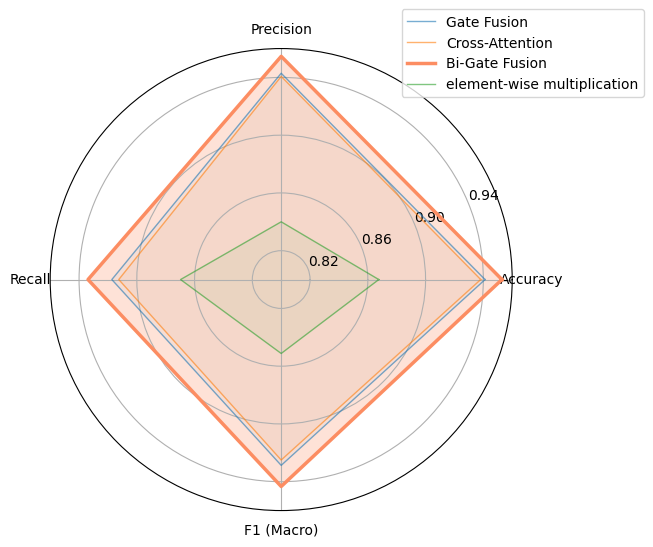

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# 数据（转成 0.xxxx）
methods = ['Gate Fusion', 'Cross-Attention', 'Bi-Gate Fusion', 'element-wise multiplication']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 (Macro)']
data = [
    [94.12, 94.29, 91.73, 92.87],
    [93.82, 94.07, 91.25, 92.50],
    [95.29, 95.46, 93.38, 94.33],
    [86.76, 84.00, 86.97, 85.12]
]

# 转成 0-1
data = [[v / 100 for v in row] for row in data]

# 角度
angles = np.linspace(0, 2*np.pi, len(metrics), endpoint=False).tolist()
angles += angles[:1]  # 闭合

# 雷达图
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# 调整半径范围（放大差距）
ax.set_ylim(0.80, 0.96)

for method, values in zip(methods, data):
    values += values[:1]  # 闭合
    if method == 'Bi-Gate Fusion':
        ax.plot(angles, values, label=method, linewidth=2.5, color='#fc8d62')
        ax.fill(angles, values, alpha=0.25, color='#fc8d62')
    else:
        ax.plot(angles, values, label=method, linewidth=1, alpha=0.6)
        ax.fill(angles, values, alpha=0.05)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics)

# y 轴刻度用小数
yticks = [0.82, 0.86, 0.90, 0.94]
ax.set_yticks(yticks)
ax.set_yticklabels([f"{y:.2f}" for y in yticks])

ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.show()
